## Logistic Regression

Flowchart of work ->

1. Import Libraries:
Load required libraries for data analysis, preprocessing, model building, and evaluation.

2. Exploratory Data Analysis (EDA):
Understand dataset structure, visualize distributions, and identify patterns or outliers.

3. Data Preprocessing:
Handle missing values, encode categorical variables, and split data into features (X) and target (y).

4. Feature Scaling:
Standardize or normalize features using scaling techniques (e.g., StandardScaler).

5. Model Implementation:
Train a logistic regression model, tune parameters, and split data into train/test subsets.

6. Model Evaluation:
Assess performance using metrics like accuracy, precision, recall, and AUC-ROC.

7. Object Serialization:
Save the trained model and preprocessing objects as pickle files for reuse.

8. Streamlit Application:
Develop a user-friendly web app to showcase predictions and model performance.

### step1. Importing Libraries

In [6]:
#importing the essential Libraries ->

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder , StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score



 
%matplotlib inline


#### Loading Dataset to model

In [7]:
# df - > Trained dataset
# df_test -> testing dataset

df = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
"""
Categorical Columns -> Sex , Name , Ticket
"""

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#drop down the unnecceaasry columns form dataset

df  = df.drop(["PassengerId" , "Name" , "Ticket" , "Cabin" , "Embarked"] , axis=1)


In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [20]:
# Rearrangment of Columns 
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Survived']]
df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1


In [11]:
#task -> to fill age column with certain value we need to analyse the age column

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


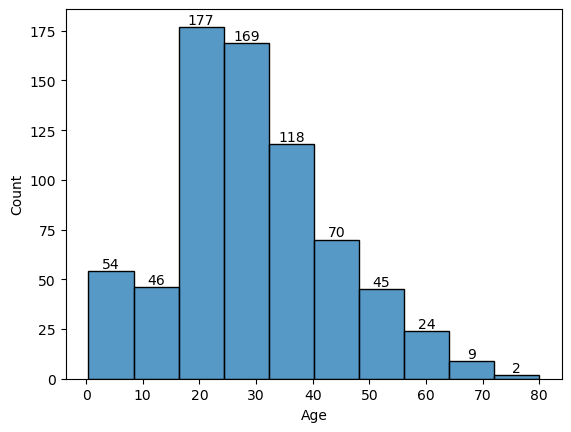

In [21]:
ax = sns.histplot(df["Age"] , bins=10)

for p in ax.patches:
    count = int(p.get_height())  # Get the height (count) of the bar
    x = p.get_x() + p.get_width() / 2  # Calculate the x-coordinate
    y = p.get_height()  # Calculate the y-coordinate
    ax.annotate(count, (x, y), ha='center', va='bottom')  # Add the text


In [23]:
#averaage age of male/female group

df.groupby("Sex")['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [24]:
#let put the missing values with above figure in data set
df["Age"] = df["Age"].fillna(df['Sex'].apply(lambda sex : 30 if sex == 'male' else 27))

In [25]:
df["Age"].isnull().sum()
    

0

In [26]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

#### Clean dataset without any null values

In [27]:
df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


#### Encoding the columns 

In [28]:
# encode Sex column female = 0 and male = 1
df["Sex"] = df["Sex"].apply(lambda x: 1 if x=='male' else 0)

In [29]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


In [33]:
# finding correlation among the columns

df_corr = df.corr()

In [34]:
df_corr

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,0.131900,-0.334474,0.083081,0.018443,-0.549500,-0.338481
Sex,0.131900,1.000000,0.103147,-0.114631,-0.245489,-0.182333,-0.543351
Age,-0.334474,0.103147,1.000000,-0.237619,-0.179714,0.091350,-0.078901
SibSp,0.083081,-0.114631,-0.237619,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,-0.245489,-0.179714,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,-0.182333,0.091350,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,-0.543351,-0.078901,-0.035322,0.081629,0.257307,1.000000


<Axes: >

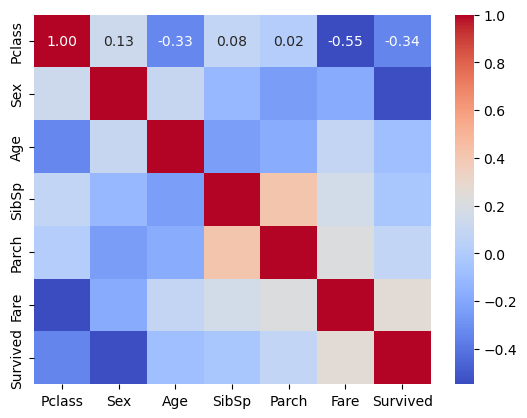

In [35]:
sns.heatmap(df_corr , cmap='coolwarm' , annot=True ,fmt='.2f')

In [ ]:
'''
Annotated Value Interpretation

> 0.5 to 1.0: Strong Positive Relationship
As one variable increases, the other increases strongly.

0.0 to 0.5: Weak Positive Relationship
As one variable increases, the other also increases, but weakly.

0.0: No Relationship
No clear pattern or relationship between the variables.

< 0.0 to -0.5: Weak Negative Relationship
As one variable increases, the other decreases slightly.

-0.5 to -1.0: Strong Negative Relationship
As one variable increases, the other decreases strongly.

= 1.0: Perfect Positive Relationship
Both variables increase together in a perfectly linear manner.

= -1.0: Perfect Negative Relationship
As one variable increases, the other decreases in a perfectly linear manner.
'''

In [36]:
df.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [42]:
df.pivot_table(columns='Pclass' , index='Survived', values="Age", aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [45]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


### dataset division and scaling

In [47]:
X = df.drop(columns = 'Survived')
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [51]:
y  = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [54]:
#Data splitting into train and test

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [ ]:
''' 
-- points to keep in mind while doing splitting and scaling --

1. Always do splitting first the go for scaling split -> scale -> scale.fit_transform(X_train) -> scaler.transform(X_test)
2. This approach will reduce data leakage.
3. fit() -> The fit() method calculates the necessary statistics (like the mean and standard deviation) from the dataset 
            to scale the features.
4. transform() -> The transform() method applies the scaling (mean and standard deviation) learned during fit() to the data.
5. fit_transform() -> This is just a shorthand for calling fit() followed by transform() on the same dataset. 
                    You use this on the training data because you're both calculating the scaling parameters and applying them.

'''

In [56]:
# Scaling the dataset

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)



### Implementation of Logistic Regression

In [60]:
logisticRegression = LogisticRegression()

In [61]:
logisticRegression

LogisticRegression()

In [63]:
# train the model based on the dataset. fitting the train dataset X_train , y_train


logisticRegression.fit(X_train , y_train)

LogisticRegression()

In [67]:
#predicting the X_test dataset

y_pred = logisticRegression.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [68]:
#check score how much match we got

logisticRegression.score(X_test , y_test)

0.8156424581005587

### Evaluation of metrics for model

In [79]:
# 1. Accuracy
# What it measures: The ratio of correctly predicted observations to the total observations.

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , y_pred)
print(f"The accuracy score = {accuracy:.2f}")

The accuracy score = 0.82


In [78]:
#precision score
#What it measures: Precision is the ratio of correctly predicted positive observations to the total predicted positives. 
# It answers the question: "How many of the positively predicted instances were actually positive?"

from sklearn.metrics import precision_score
precision = precision_score(y_test , y_pred)

print(f"The precision is = {precision:.2f}")

The precision is = 0.81


In [80]:
#recall_score (Sensitivity or True Positive Rate)
#What it measures: Recall is the ratio of correctly predicted positive observations to all actual positives. 
# It answers the question: "How many of the actual positive instances were correctly predicted?"

from sklearn.metrics import recall_score

recall = recall_score(y_test , y_pred)
print(f"The recall score is = {recall:.2f}")

The recall score is = 0.73


In [82]:
#f1_score
#What it measures: The F1-score is the harmonic mean of precision and recall. 
# It balances both the precision and recall and is useful when you have an uneven class distribution.

from sklearn.metrics import f1_score

f1 = f1_score(y_test , y_pred)

print(f"The f1 score is = {f1:.2f}")


The f1 score is = 0.77


In [84]:
from sklearn.metrics import classification_report

report = classification_report(y_test , y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



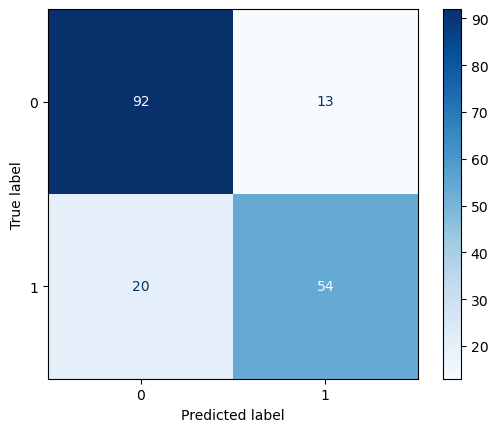

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


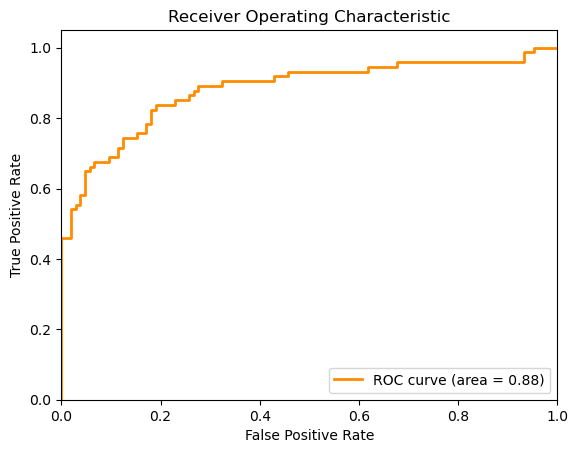

In [87]:
# ROC Curve

from sklearn.metrics import roc_curve , auc

fpr, tpr, thresholds = roc_curve(y_test, logisticRegression.predict_proba(X_test)[:,1])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

plt.legend(loc="lower right")

plt.show()





### Creation pickle File

In [88]:
#creating pickle file so we ca use it in stremlite program function

import pickle

# Save the trained model and scaler to disk
with open('titanic_model.pkl', 'wb') as model_file:
    pickle.dump(logisticRegression, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)